In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [45]:
import  plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [46]:
data=pd.read_csv("/content/Age,Gender,Marital Status,Occupation.csv")

In [47]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [48]:
data.isnull().sum()

,0
Age,0
Gender,0
Marital Status,0
Occupation,0
Monthly Income,0
Educational Qualifications,0
Family size,0
latitude,0
longitude,0
Pin code,0


In [49]:
px.histogram(data,x="Age",color="Gender")

In [50]:
import seaborn as sns

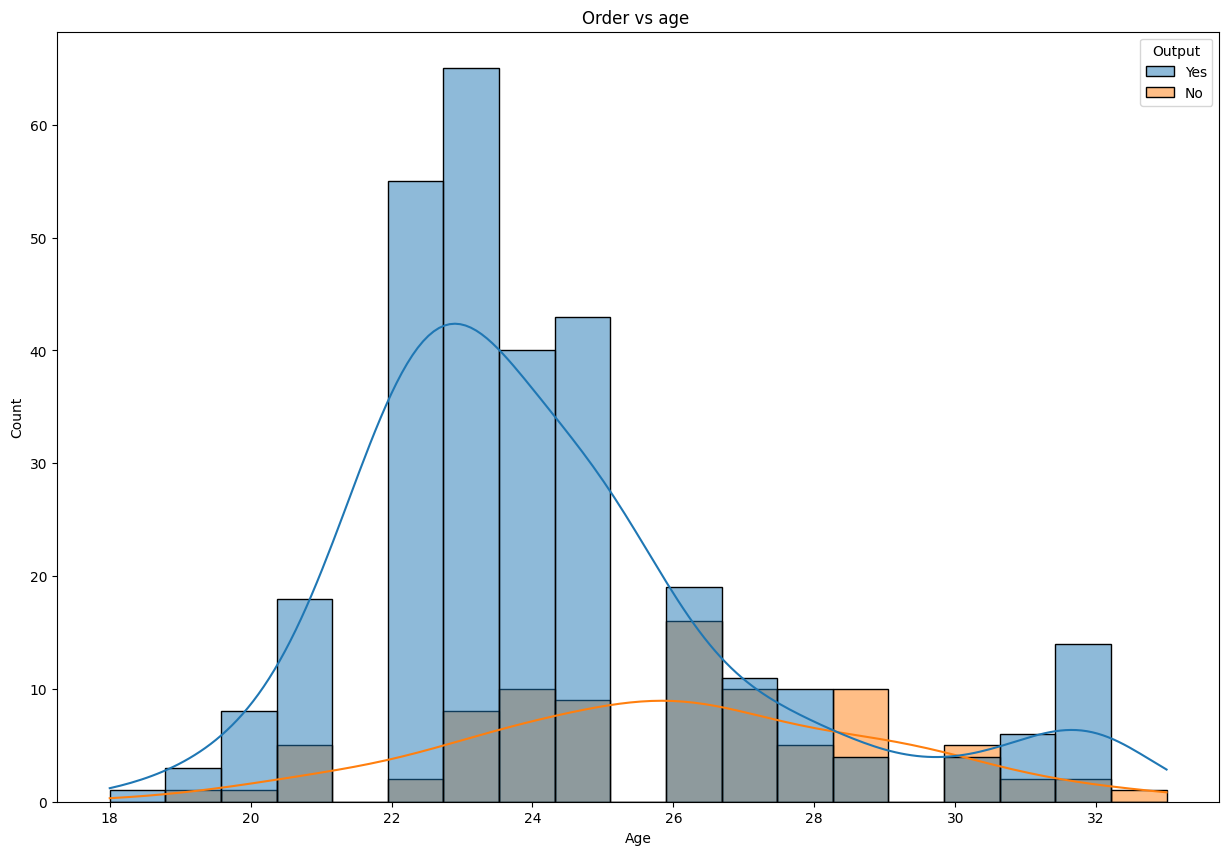

In [51]:
plt.figure(figsize=(15,10))
plt.title("Order vs age ")
sns.histplot(x="Age", hue="Output", data=data,kde=True)
plt.show()

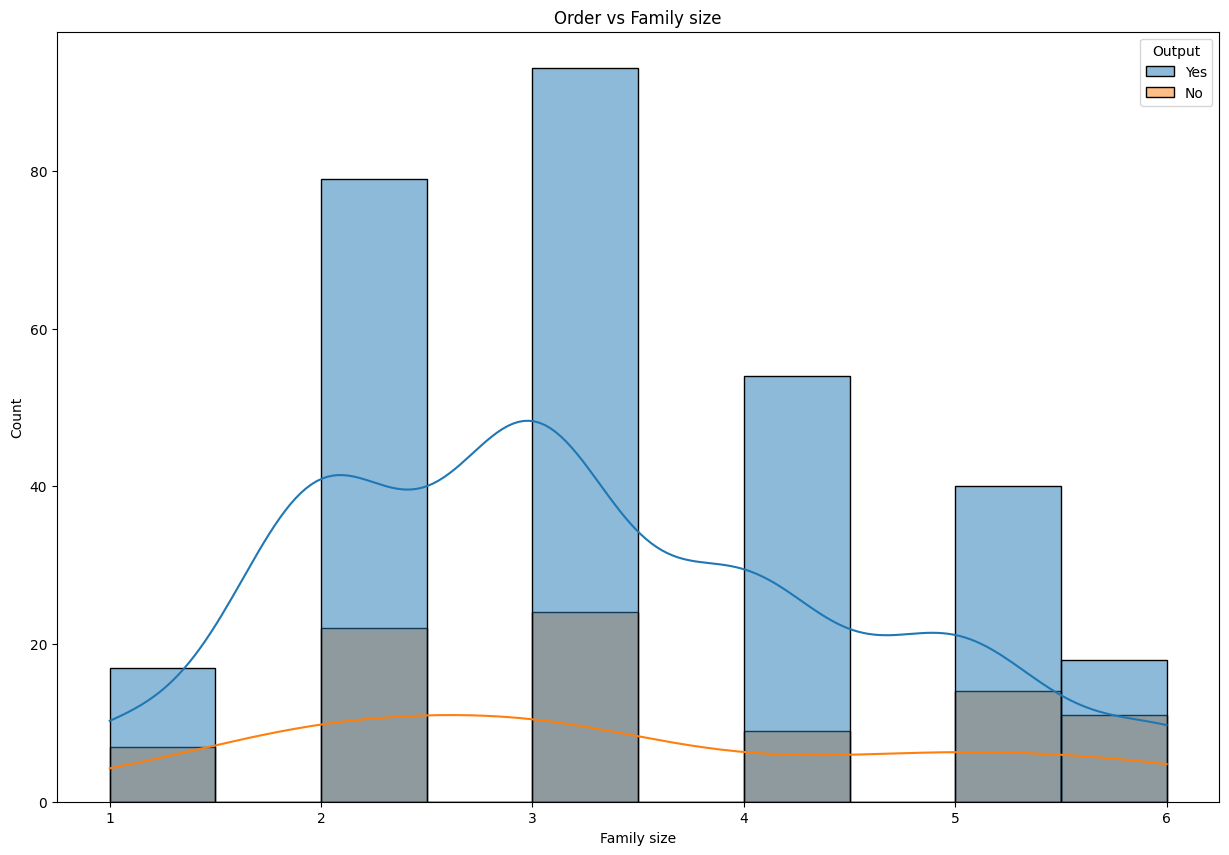

In [52]:
plt.figure(figsize=(15,10))
plt.title("Order vs Family size")
sns.histplot(x="Family size",hue="Output",kde=True,data=data)
plt.show()

In [53]:
fig=px.histogram(data,x="Family size",color="Output")
fig.show()

In [54]:
buying_again_data = data.query("Output == 'Yes'")
buying_again_data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [55]:
fig=px.pie(buying_again_data,names="Gender",hole=0,title="Who Orders Food Online More: Male Vs. Female")
fig.show()

In [56]:
fig=px.pie(buying_again_data,names="Marital Status",hole=0.1,title="who order more married or unmarried")
fig.show()

In [57]:
fig=px.pie(buying_again_data,names="Occupation",hole=0.1,title="who order more student or working")
fig.show()

In [58]:
fig=px.pie(buying_again_data,names="Monthly Income",hole=0.2,title="which income slab order more ")
fig.show()

In [59]:
#converting all categorical figure into numerical ones
data["Gender"]=data["Gender"].map({"Male":1,"Female":0})
data["Marital Status"]=data["Marital Status"].map({"Single":2,"Married":1,"Prefer not to say":0})
data["Occupation"]=data["Occupation"].map({"Student": 1,"Employee": 2,"Self Employeed": 3, "House wife": 4})
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0,
                                                     "25001 to 50000": 5000,
                                                     "More than 50000": 7000,
                                                     "10001 to 25000": 25000,
                                                     "Below Rs.10000": 10000})
data["Output"]=data["Output"].map({"Yes":1,"No":0})

In [60]:
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1,
                                                                             "Post Graduate": 2,
                                                                             "Ph.D": 3, "School": 4,
                                                                             "Uneducated": 5})
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0,
                                                     "25001 to 50000": 5000,
                                                     "More than 50000": 7000,
                                                     "10001 to 25000": 25000,
                                                     "Below Rs.10000": 10000})
data["Feedback"] = data["Feedback"].map({"Positive": 1, "Negative ": 0})
print(data.head())

   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       0               2           1             NaN   
1   24       0               2           1             NaN   
2   22       1               2           1             NaN   
3   22       0               2           1             NaN   
4   22       1               2           1             NaN   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           2            4   12.9766    77.5993    560001   
1                           1            3   12.9770    77.5773    560009   
2                           2            3   12.9551    77.6593    560017   
3                           1            6   12.9473    77.5616    560019   
4                           2            4   12.9850    77.5533    560010   

   Output  Feedback Unnamed: 12  
0       1         1         Yes  
1       1         1         Yes  
2       1         0         Yes  
3       1         1         

In [61]:
x = np.array(data[["Age", "Gender", "Marital Status", "Occupation", "Monthly Income", "Educational Qualifications","Family size", "Pin code", "Feedback"]])
y = np.array(data[["Output"]])

In [71]:
from sklearn.ensemble import RandomForestClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.10,
                                                random_state=43
                                                )
model = RandomForestClassifier()

In [72]:
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.8974358974358975


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
features = np.array([[a, b, c, d, e, f, g, h, i]])
print("Finding if the customer will order again: ", model.predict(features))

Enter Customer Details to Predict If the Customer Will Order Again
